###### CSCE 320 :: Principles of Data Science ::Texas A&M University :: Fall 2020


# Homework 2: Super Regression Funtime

### 100 points [6% of your final grade]
### Due: September 22nd by 11:59pm

*Goals of this homework:* The objective of this homework is to get your hands dirty with linear regression -- including feature mapping, setting up a train/test evaluation framework, and evaluating the quality of regression models based on different feature combinations.


*Submission instructions (Canvas):* To submit your homework, rename this notebook as `UIN_hw2.ipynb`. For example, if your UIN is `123456789`, then your homework submission would be something like `123456789_hw2.ipynb`. Submit this notebook via Canvas (looking for homework 2 under the assignment section).  Your notebook should be completely self-contained, with the results visible in the notebook. We should not have to run any code from the command line, nor should we have to run your code within the notebook (though we reserve the right to do so). So please run all the cells for us, and then submit.

*Late submission policy:* For this homework, you may use up to three of your late days, meaning that no submissions will be accepted after September 25th at 11:59pm.

## Diamonds are Forever

### Getting started: 
We're going to explore the features that impact the price of diamonds. We've provided a file called *diamonds.csv*. Let's load it and take a look: 

In [115]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

diamonds = pd.read_csv('diamonds.csv', index_col=0)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.57,Ideal,E,VS1,61.4,57.0,2068,5.37,5.32,3.28
1,0.32,Very Good,G,VS2,62.0,59.0,561,4.37,4.41,2.72
2,1.60,Very Good,E,SI2,62.0,57.0,9900,7.47,7.54,4.65
3,0.44,Premium,I,VVS2,61.5,57.0,1063,4.92,4.87,3.01
4,1.02,Very Good,H,SI1,61.6,58.0,4727,6.49,6.54,4.01


You'll see that each row represents a particular diamond. 

What are the **features**?
  - *carat*: the carat weight measures the mass of the diamond
  - *cut*: a measurement of a diamond's light performance (it's *sparkle*). Ideal > Premium > Very Good > Good > Fair
  - *color*: diamonds are graded from colorless (D) to intense color (Z)
  - *clarity*: measures the diamond's blemishes. Internally Flawless (IF) is the best in our dataset. IF > VVS1 > VVS2 > VS1 > VS2 > SI1 > SI2 > I1.
  - depth 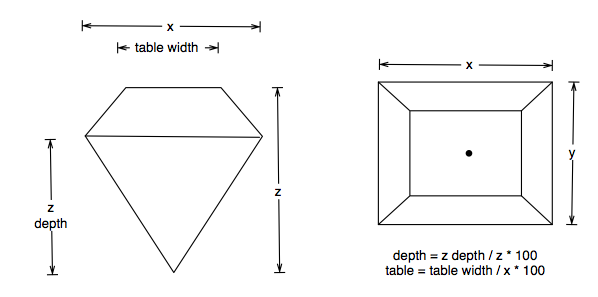
  - *table*
  - *x*
  - *y*
  - *z*
  
What do we care about predicting? That is, what is the **response** (or the **target**)?
- price

Let's start by building a linear regression model to predict the **price** of a diamond based on just the **table** and **depth** features.

In [116]:
# split into features and the target of our regression
x_features = diamonds[['table', 'depth']]
y_target = diamonds['price']
x_features.shape, y_target.shape

((48546, 2), (48546,))

In [117]:
# create a training set and a test set
# in this case, we split the total data into 50% train / 50% test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x_features, y_target, test_size=0.5, random_state=0)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((24273, 2), (24273,), (24273, 2), (24273,))

In [118]:
# now let's build our linear regression model
# first we fit the model based only on our training data
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

# print intercept and coefficients
print("Intercept = ", lm.intercept_)
print("coefficients = ", lm.coef_)

Intercept =  -14686.72709143673
coefficients =  [245.77915374  73.11892849]


In [119]:
# what's the R-squared over our training data?
lm.score(X_train, y_train)

0.01722164657052183

In [120]:
# what's the R-squared over our test data?
lm.score(X_test, y_test) 

0.015848895404950936

So what do we learn? Our two features are not very good predictors of price. Let's see if we can do better.

### (15 points) Improving the model

Next, we're going to build an improved linear regression model to predict the price of a diamond based on an analysis of **all features** (carat, cut, clarity, depth, table, x, y, z). Your goal will be to find the best combination of features.

To get there, we need to massage our data to get it into the right format. 

 - First, the two ordinal features **cut** and **clarity** need special attention: you have to make sure that the numerical values are associated with the corresponding strings (e.g., *'Ideal'*). Thus, you should setup an explicit mapping dictionary to convert the ordinal variables to integer values (e.g., Ideal --> 1, Premium --> 2, ...).
 - Second, the categorical feature **color** does not have an explicit ranking (that is, colorless and intense color may be equally preferred). You should introduce [dummy variables][1] so that you can map **color** to these dummy variables.

[1]: https://en.wikipedia.org/wiki/Dummy_variable_(statistics)

In [121]:
# convert ordinal features
cutDict = {'Ideal': 1, 'Premium':2, 'Very Good': 3, 'Good': 4, 'Fair': 5}
clarityDict = {'IF': 1, 'VVS1': 2, 'VVS2':3, 'VS1':4, 'VS2': 5, 'SI1': 6, 'SI2':7,'I1':8}
Diamond_df = pd.DataFrame(diamonds)
#Changing Data
Diamond_df.replace({'cut':cutDict},inplace=True)
Diamond_df.replace({'clarity':clarityDict},inplace=True)
%matplotlib inline
Diamond_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.57,1,E,4,61.4,57.0,2068,5.37,5.32,3.28
1,0.32,3,G,5,62.0,59.0,561,4.37,4.41,2.72
2,1.60,3,E,7,62.0,57.0,9900,7.47,7.54,4.65
3,0.44,2,I,3,61.5,57.0,1063,4.92,4.87,3.01
4,1.02,3,H,6,61.6,58.0,4727,6.49,6.54,4.01


In [77]:
# convert categorical feature
colourDum = pd.get_dummies(diamonds['color']) #drop_first=True
dataf = Diamond_df.merge(colourDum,left_index=True, right_index=True)
%matplotlib inline
dataf.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,D,E,F,G,H,I,J
0,0.57,1,E,4,61.4,57.0,2068,5.37,5.32,3.28,0,1,0,0,0,0,0
1,0.32,3,G,5,62.0,59.0,561,4.37,4.41,2.72,0,0,0,1,0,0,0
2,1.60,3,E,7,62.0,57.0,9900,7.47,7.54,4.65,0,1,0,0,0,0,0
3,0.44,2,I,3,61.5,57.0,1063,4.92,4.87,3.01,0,0,0,0,0,1,0
4,1.02,3,H,6,61.6,58.0,4727,6.49,6.54,4.01,0,0,0,0,1,0,0


### (15 points) Evaluation using k-fold cross-validation

We're going to test the quality of the regression model you find using **k-fold cross-validation**. Unlike our train-test split shown above, here we're going to divide the dataset k times and report the average results over these k different splits. For the rest of this regression part of the homework, we'll use **k=10**. Make sure to set `random_state=0`.

In [11]:
from sklearn.model_selection import KFold
### your code here ###
kf = KFold(n_splits=10,random_state=0, shuffle=True)
x_features = dataf[['table', 'depth']] 
y_target = dataf['price']
#print(kf.split(x_features))
results = []
avg_train = 0
avg_test = 0
for train_index, test_index in kf.split(x_features):
    avg_train += lm.score(X_train, y_train)
    avg_test += lm.score(X_test, y_test)
    
    X_train = x_features.iloc[train_index]
    X_test = x_features.iloc[test_index]
    y_train = y_target.iloc[train_index]
    y_test = y_target.iloc[test_index]

avg_train /= 10
avg_test /= 10
print("Avg Train: ",avg_train)
print(" Avg Test: ",avg_test)

Avg Train:  0.016591716265661426
 Avg Test:  0.0165686666570108


### (30 points) Finding the best model

Now the fun part. You should conduct a series of experiments to identify what you think is the best combination of features for predicting a diamond's price. To help you out, you should calculate the mean absolute error, mean squared error, and $R^2$ value over the training set and the test set (all the metrics are provided [here](http://scikit-learn.org/stable/modules/model_evaluation.html)). 

Analyze which combinations of features yield better performance on the test set. While we don't expect you to enumerate all possible combinations below, we do want to see a reasonable line of thinking that guides your decisions. Show us some initial attempts, intermediate ones, and finally your best one.

In [35]:
from sklearn import metrics
# initial attempts
x_features = dataf[['carat']]
y_target = dataf['price']

X_train, X_test, y_train, y_test = train_test_split(
    x_features, y_target, test_size=0.5, random_state=0)


lmCD = LinearRegression()
lmCD.fit(X_train, y_train)
print("R^2 Value:",lmCD.score(X_test, y_test))
y_pred = lmCD.predict(X_test)
print("Mean Abs. Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Sqr. Error:",metrics.mean_squared_error(y_test,y_pred))

R^2 Value: 0.8469780337429886
Mean Abs. Error: 1009.0196369756336
Mean Sqr. Error: 2405310.8551332452


In [26]:
# intermediate attempts
x_features = dataf[['clarity', 'carat']] #carat & depth is good..?/ carat & cut = closer/ carat & clarity = closer
y_target = dataf['price']

X_train, X_test, y_train, y_test = train_test_split(
    x_features, y_target, test_size=0.5, random_state=0)

lmCD = LinearRegression()
lmCD.fit(X_train, y_train)
print("R^2 Value:",lmCD.score(X_test, y_test))
y_pred = lmCD.predict(X_test)
print("Mean Abs. Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Sqr. Error:",metrics.mean_squared_error(y_test,y_pred))

R^2 Value: 0.8843760173891702
Mean Abs. Error: 906.5311087251777
Mean Sqr. Error: 1817462.0761339464


In [63]:
# final (best) attempt
x_features = dataf[['carat', 'clarity', 'J']]
y_target = dataf['price']

X_train, X_test, y_train, y_test = train_test_split(
    x_features, y_target, test_size=0.5, random_state=0)


lmCD = LinearRegression()
lmCD.fit(X_train, y_train)
print("R^2 Value:",lmCD.score(X_test, y_test))
y_pred = lmCD.predict(X_test)
print("Mean Abs. Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Sqr. Error:",metrics.mean_squared_error(y_test,y_pred))

R^2 Value: 0.89293043512799
Mean Abs. Error: 882.2403439080354
Mean Sqr. Error: 1682997.499904617


Add a brief discussion here on:
 - What features are in your final model?
 - What impact do they have on the price of a diamond?
 - Do you observe anything interesting or suprising?

1. The features in my final model are cut, clarity, and "J" color (so more intense of a color)
2. The have an impact on the price of a diamond by raising the price. 
3. I was surprised that depth with clarity had the least impact on the price. I thought that the more clear and bigger/deeper the diamond would raise the price.

## Lasso Regression

In the second part of this homework, you will play with another regression model on the diamonds data.  

The **Lasso** is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer non-zero coefficients, effectively reducing the number of features upon which the given solution is dependent. Recall our discussion from class about how Lasso adds a *regularization term*.  

Mathematically, it consists of a linear model with an added regularization term. The objective function to minimize is:   
<center>$\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$</center>
The Lasso estimate thus solves the minimization of the least-squares penalty with $\alpha ||w||_1$ added, where $\alpha$ is a constant and $||w||_1$ is the $\ell_1$-norm of the coefficient vector.

### (10 points) Initial attempt on Lasso
Let's start our exploration on Lasso Regression by using [its sklearn implementation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso). For the intial attempt, set the parameter $\alpha$(alpha) to **0.1**, and calculate the mean absolute error, mean squared error, and $R^2$ value over the training set and the test set.

In [137]:
from sklearn.linear_model import Lasso
### your code here ###
lassoReg = Lasso(alpha=0.1,normalize=True)
lassoReg.fit(X_train,y_train)
print("R^2 value:", lassoReg.score(X_test,y_test))

y_pred = lassoReg.predict(X_test)
print("Mean Abs. Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Sqr. Error:",metrics.mean_squared_error(y_test,y_pred))


R^2 value: 0.015793111764814127
Mean Abs. Error: 2980.346485716832
Mean Sqr. Error: 15470481.590812365


### (20 points) Feature selection with Lasso  
Now, let's control the degree of sparsity of the estimated coefficients by tuning the parameter $\alpha$(alpha). For this section, you will also need to print out the estimated coefficients.

In [128]:
### your code here ###
########### Alpha = .02
lassoReg = Lasso(alpha=0.02,normalize=True)
lassoReg.fit(X_train,y_train)


y_pred = lassoReg.predict(X_test)


############## Alpha = .001
lassoReg = Lasso(alpha=0.001,normalize=True)
lassoReg.fit(X_train,y_train)


y_pred = lassoReg.predict(X_test)


####### Alpha = .05
lassoReg = Lasso(alpha=0.05,normalize=True)
lassoReg.fit(X_train,y_train)


y_pred = lassoReg.predict(X_test)


Record your experiment results in the following table:  

| value of $\alpha$ | Name of Features with<br>Non-zero Coefficients |   MAE  |   MSE  |  $R^2$ |
|:-----------------:|:----------------------------------------------:|:------:|:------:|:------:|
    |        0.1  |                     "Carat, Clarity"       | 901.4842 | 1818853.00 | 0.88428 |
    |        .05 |                     "Carat, Clarity"       | 903.9614 | 1817967.77 | 0.88434 |
    |       .001  |                     "Carat, Clarity"       | 906.4787 | 1817468.47 | 0.88437 |
<center>(Feel free to add more rows as you need)</center>

Do you observe anything interesting or suprising?  
The higher $\alpha$ value, the more accurate the model becomes

### (10 points) Comparison with Linear Regression
Next, let's keep tuning the parameter $\alpha$ so that the Lasso Regression model assigns the same **amount** of features with non-zero coefficients as the amount of features for your final model in part 1.

In [160]:
### your code here ###

lassoReg = Lasso(alpha=0.000125,normalize=True)
lassoReg.fit(X_train,y_train)
print("R^2 value:", lassoReg.score(X_test,y_test))

y_pred = lassoReg.predict(X_test)

%matplotlib inline
Ldata = pd.DataFrame(x_features, y_test)
Ldata.head()

R^2 value: 0.015848881992382435


,table,depth
price,,
770,55.0,62.3
7706,58.0,59.1
16422,54.0,63.3
1129,57.0,61.9
1615,58.0,63.2


Add a brief discussion here on:
 - Compare the performance of this Lasso Regression model with your final model of part 1.
 - What are features that recieved non-zero coefficients from the Lasso Regression model? Are they the same as your manually selected combination? 
 - Any other thoughts you have about the results you got in this homework.
 
1. This Lasso Regression model is significantly less accurate at predicting the price of diamonds compared to the simple linear regression model.
2. The non-zero coefficients from my lasso regression model were table and depth. This is different for when I manually entered my coefficients.
3. I thought it was interesting to see and experiment with creating a more accurate model and that lasso regression only looked at table and depth of a diamond to determine its price.

## (10 points maximum) Bonus: Diamonds benchmark
The bonus question is a chance for you to explore a greater territory of [linear regression models](https://scikit-learn.org/stable/modules/linear_model.html) and [feature selections methods](https://scikit-learn.org/stable/modules/feature_selection.html) with the help of sklearn.    
 - You can try as many models or methods as you like (within the scope of sklearn.linear_model and sklearn.feature_selection), but you will need to select a final model for benchmarking. 
 - Specifically, you will train & validate your model with data contained in *diamonds.csv*, and provide your final model's predictions of samples contained in 'diamonds_bonus.csv'.
 - Your code in the next section should fill the **price** column of the 'diamonds_bonus.csv' file with your final model's predictions.
 - Submission: Submit the 'diamonds_bonus.csv' file together with your ipynb file.
 - Awards depend on the ranking of your model's $R^2$ performance among all the participants.  

|   Ranking   |   Awards  |
|:-----------:|:---------:|
|   top 10%   | 10 points |
|   top 30%   | 5 points |
|   top 60%   | 2 points |
| Effort made |  1 point |

In [ ]:
### This cell should be independently runnable, please import all necessary packages here ###
### We will randomly run at least 20% of the participants' code to valide their submitted csv file ###
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn import linear_model
from sklearn import feature_selection

from sklearn import metrics

diamonds = pd.read_csv('diamonds.csv', index_col=0)
diamonds_bonus = pd.read_csv('diamonds_bonus.csv', index_col=0)
### your code here ###

**Briefly decribe your final model** (model type, values of tunable parameters, feature selection methods, etc):    
`TODO`